In [1]:
pip install factor_analyzer

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Librerías para métricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score
import scipy 
from sklearn.decomposition import KernelPCA
from factor_analyzer import FactorAnalyzer

# Abstract:

Frente al aumento de los casos de cancer de pecho, la capacidad de descubrirlo en etapas tempranas, le aumenta las posibilidades de combartirlo al paciente. En este proyecto, abordamos el problema de la deteccion y determinacion del tipo de tumor, para entender si se trata de un tumor maligno o benigno, de forma que el paciente pueda ser tratado, lo mas rapido posible, antes de que la enfermedad se disperse y genere mas complicaciones

El objectivo principal es desarrolar un modelo, que permita descifrar cuando el tumor puede ser perjudicial. De esta forma, se procedera a analizar un total de 569 casos, indagando en sus variables principales, como perimetro, area, radio, textura, entre otras. Luego se utilizara este dataset, como base para entrenar un modelo predictivo, bajo un aprendizaje supervisado, de clasificacion

Este proyecto tiene importante implicaciones para el servicio de la salud, buscando facilitarle el trabajo a los medicos, en la comprension del tipo de protuberancia y acelerando el proceso de tratato para el paciente, de forma que el mismo sea lo mas eficiente posible y como mencionaba anteriormente, aumente la esperanza de vida.


# OBJETIVO: Predecir si el cancer es maligno en base a sus caracteristicas
<br> <br/>
### Contexto comercial 
El sector de la salud necesita profundizar en el estudio de la aparicion de protuberancias en el cuerpo, para faciliar la deteccion temprana de posibles sintomas de Cancer. Para iniciar el estudio, es muy util contar con casos positivos, que nos permita entender las caracteristicas de los tumores malignos 
<br> <br/>
### Problema comercial
La deteccion temprana de tumores malignos, aumenta las posibilidades del panciente de tener un tratamiento efectivo, permitiendole erradicar el cancer, con las menores consecuencias posibles para el cuerpo
<br> <br/>
### Contexto analítico 
Para poder desarrollar el modelo se cuenta con un conjunto de 569 casos de tumores estudiados, donde 357 son benignos y 212 malignos
<br> <br/>
Las variables disponibles (32) son las siguientes: 
<br> <br/>
1. Id
2. Diagnosis: Clasifica el tumor en benigno y maligno 
3. radius_mean: Media de las distancias del centro a los puntos del perímetro
4. texture_mean: Desviación típica de los valores de la escala de grises
5. perimeter_mean: Perimetro medio
6. area_mean: Area media
7. smoothness_mean: Suavidad media (Variación local de la longitud de los radios)
8. compactness_mean: Compacidad media (Perímetro^2 / área - 1.0)
9. concavity_mean: Concavidad (gravedad de las partes cóncavas del contorno)
10. concave points_mean: Número de porciones cóncavas del contorno
11. symmetry_mean: Simetria media
12. fractal_dimension_mean: Fractalidad media (aproximación de la "línea de costa")
13. radius_se
14. texture_se
15. perimeter_se
16. area_se
17. smoothness_se
18. compactness_se
19. concavity_se
20. concave points_se
22. symmetry_se
22. fractal_dimension_se
23. radius_worst
24. texture_worst
25. perimeter_worst
26. area_worst
27. smoothness_worst
28. compactness_worst
29. concavity_worst
30. concave points_worst
31. symmetry_worst
32. fractal_dimension_worst


In [59]:
url = "https://raw.githubusercontent.com/Mar77to/Entrega-final/main/Cancer.csv"

In [60]:
df = pd.read_csv(url, index_col=0)
print (df.head())

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_

# Variable Target: diagnosis
La variable objetivo es de tipo **Binaria**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Clasificacion**. 


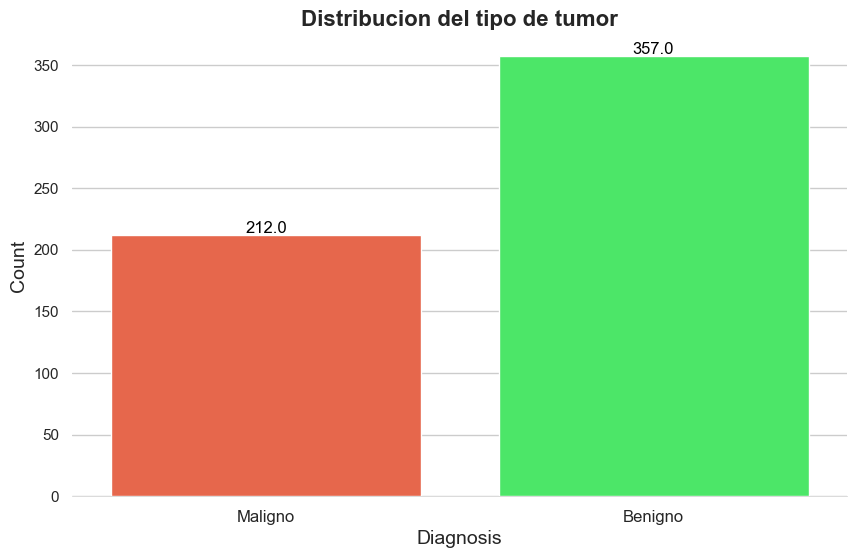

In [61]:
colors = ['#FF5733', '#33FF57']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df, palette=colors)

plt.title('Distribucion del tipo de tumor', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Maligno', 'Benigno'], fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.set(style="whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
df['diagnosis']=LabelEncoder().fit_transform(df['diagnosis'])

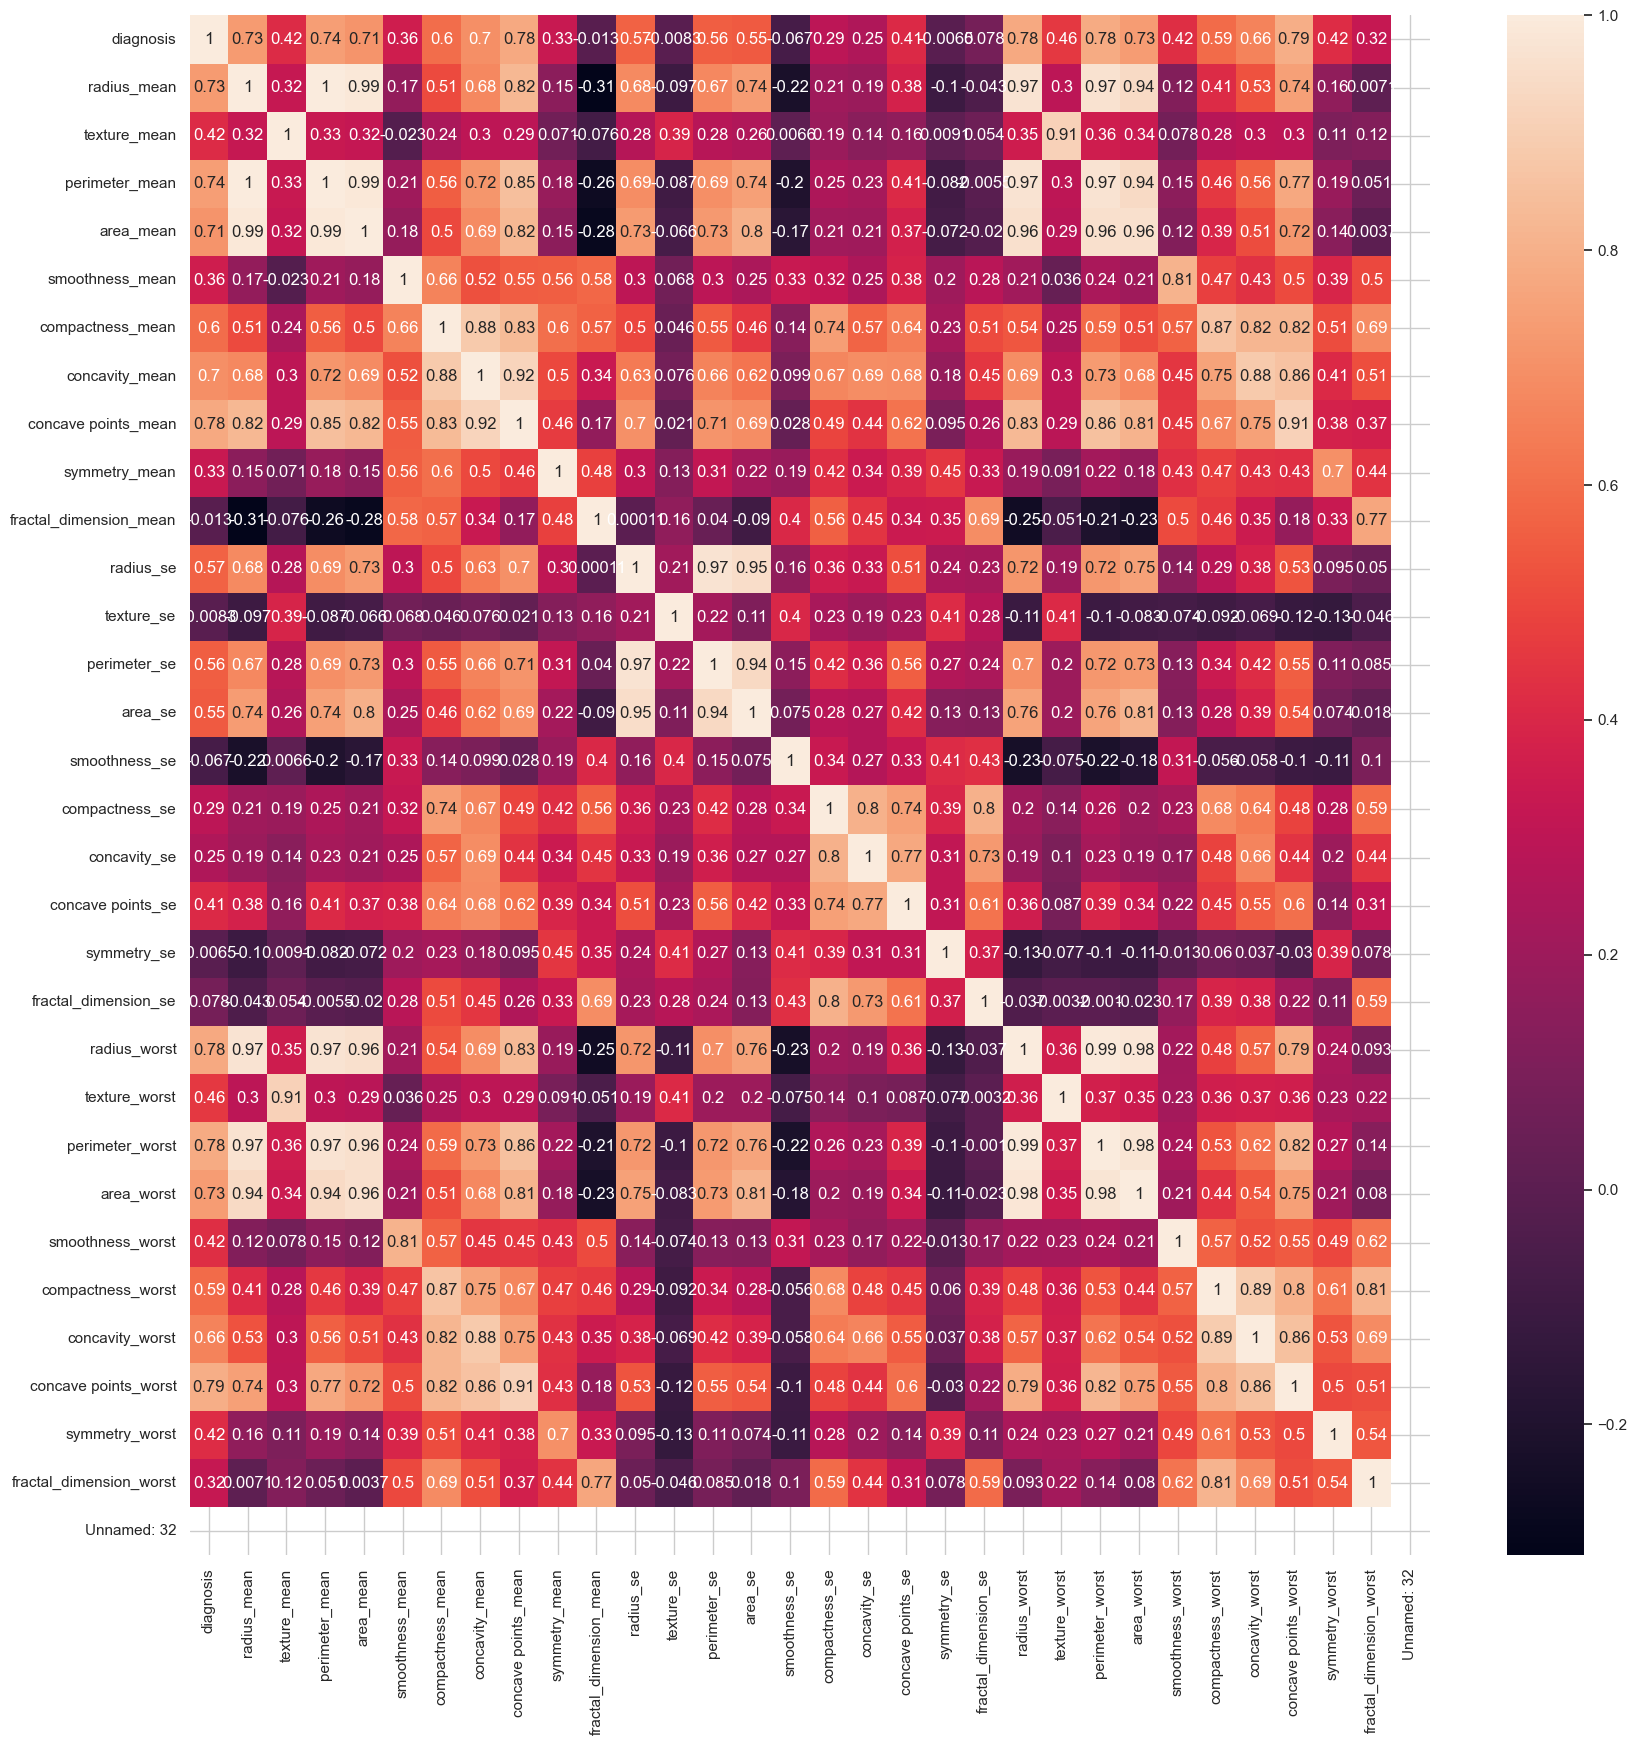

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Mediante el mapa de calor, podemos determinar que el area, el perimetro y el radio del tumor, son variables interesantes para tomar en cuenta, en cuanto a los casos positivos de tumores malignos. Para agilizar el analisis y facilitarle el entendimiento a nuestro cliente, reduciremos el mapa del calor a sus tres principales variables. De esta forma tambien sera mas facil incluirlo en la presentacion

In [64]:
from sklearn.preprocessing import LabelEncoder
df['diagnosis']=LabelEncoder().fit_transform(df['diagnosis'])

## Datos nulos

Pero antes analizaremos si nuestro dataset posee datos nulos

In [65]:
df.isnull()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
842517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
84300903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
84348301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
84358402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
926682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
926954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Conclusion

Vemos que nuestro dataset tiene una columna, que posee solamente 32 registros nulos, los cuales no aportan datos para el analisis. De esta forma, procederemos a eliminarla

In [66]:
df=df.drop("Unnamed: 32",axis=1)

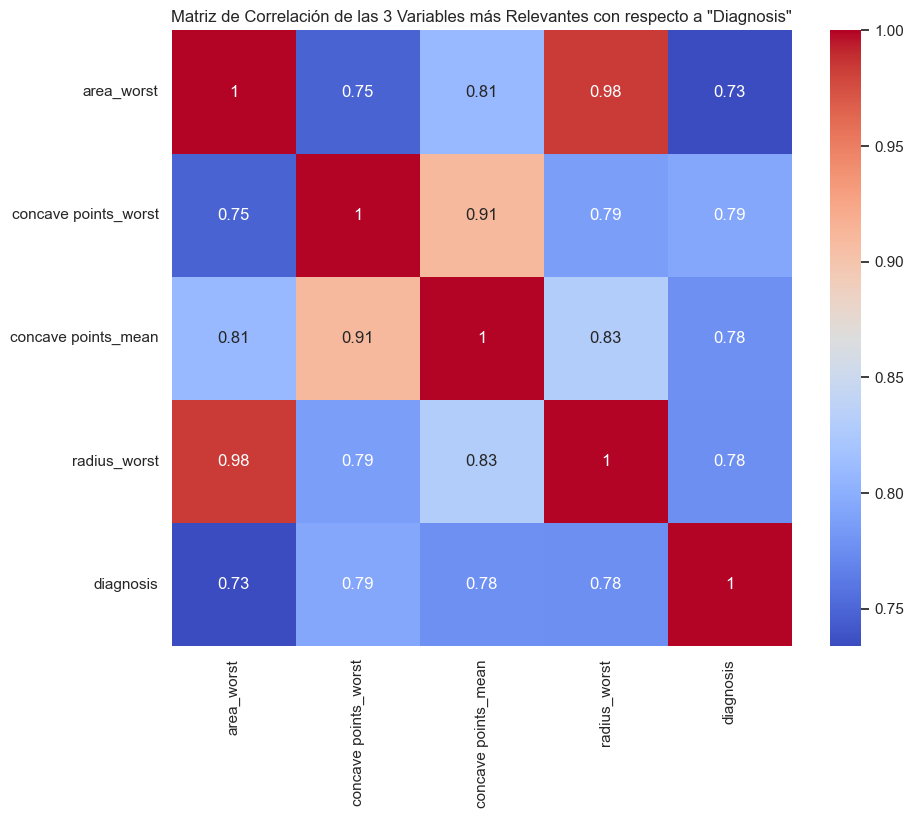

In [67]:
# Separar las variables independientes (X) de la variable dependiente (y)
X = df.drop('diagnosis', axis=1)  # Reemplaza 'Diagnosis' con el nombre de tu variable dependiente
y = df['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame con las variables y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las tres variables más relevantes
top_features = feature_importance_df.head(4)['Feature'].tolist()

# Filtrar el DataFrame original para incluir solo las tres variables más relevantes y la variable "Diagnosis"
df_top_features = df[top_features + ['diagnosis']]

# Crear la matriz de correlación para las tres variables más relevantes con respecto a "Diagnosis"
plt.figure(figsize=(10, 8))
sns.heatmap(df_top_features.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las 3 Variables más Relevantes con respecto a "Diagnosis"')
plt.show()

# Filter Feature Selection 

Para terminar corrobar si las variables que arrojo el mapa de calor, son las que tienen una relacion fuerte con nuestra variable Target, realizaremos dos analisis mas: una matriz de Pearson y un Wrapper Feature Selection. De esta forma, la coincidencia que arroje los tres estudios, seran las variables que estudiaremos para armar nuestros modelos de Machine Learning


## Correlación con el Target
 # Matriz de Pearson

In [69]:
matriz_correlacion = df.corr(method='pearson')
matriz_correlacion_target = matriz_correlacion['diagnosis']
matriz_correlacion_target = abs(matriz_correlacion_target)
columnas_a_excluir = ['diagnosis']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

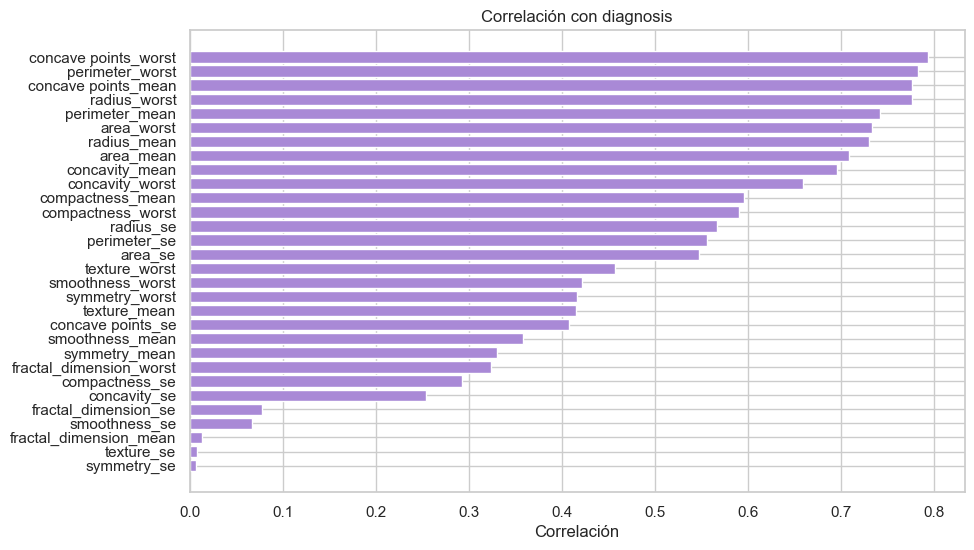

In [71]:
matriz_correlacion_target_graficar = matriz_correlacion_target[0:30]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con diagnosis')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# Wrapper Feature Selection

In [72]:
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [73]:
X = df[["concave points_worst","perimeter_worst","radius_worst","area_worst","compactness_worst","symmetry_worst","texture_worst","concavity_worst","smoothness_worst","fractal_dimension_worst"]]    

y = df["diagnosis"]

In [74]:
VARIABLES_ELEGIDAS = forward_selection(data = X,
                                       target = y,
                                       significance_level = 0.01)
print("Quedaron seleccionadas:")
VARIABLES_ELEGIDAS

Quedaron seleccionadas:


['concave points_worst',
 'radius_worst',
 'texture_worst',
 'area_worst',
 'smoothness_worst']

In [75]:
print('De ' + str(X.shape[1]) + ' features, se seleccionaron ' + str(len(VARIABLES_ELEGIDAS))) 

De 10 features, se seleccionaron 5


In [76]:
print("Quedaron afuera:")
elementos_no_en_lista = [x for x in X.columns if x not in VARIABLES_ELEGIDAS]
elementos_no_en_lista

Quedaron afuera:


['perimeter_worst',
 'compactness_worst',
 'symmetry_worst',
 'concavity_worst',
 'fractal_dimension_worst']

## Hipotesis

Para corrobar el mapa de calor, realizamos un analisis de feature selection, de dos formas distintas: Wrapper Selection y un analisis de correlacion. De esta forma, vemos que los tumores malignos, se pueden diferenciar principalmente por las siguientes variables, que se repiten en ambos analisis como principales "radius_worst","concave points_worst","area_worst"

## Analizando las variables

Continuando con el analisis, entender los valores que pueden tomar las variables mencionadas, les permitira al sector medico, tener una aproximacion de los valores que al sobrepasarlos, ya tendrian la primer bandera roja. Hay que tener en cuenta que los datos expresados son el resultado de las diferentes imagenes tomadas de los tumores, que para simplificar los datos, se calculo la media de los valores computados para cada caso

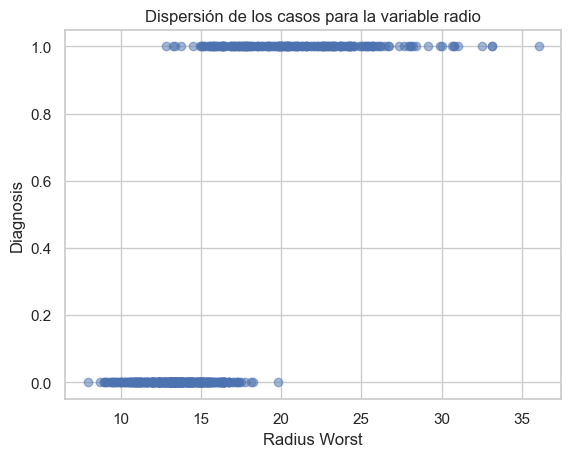

In [77]:
filtered_df = df['diagnosis']

# Variables
radius_mean_values = df['radius_worst']
variable_numerica_values = filtered_df

# Crear el gráfico de dispersión
plt.scatter(radius_mean_values, variable_numerica_values, alpha=0.5)

# Etiquetas y título
plt.xlabel('Radius Worst')
plt.ylabel('Diagnosis')
plt.title('Dispersión de los casos para la variable radio')

# Mostrar el gráfico
plt.show()

## Conclusion
Le asignamos "1" a los casos malignos y "0" a los casos benignos. Entre mas amplio el radio, mas aumentan las posibilidades de que el cancer sea maligno. Para esta ocasion, tomaremos como insight los casos que superen el valor de 15, de la media previamente calculada

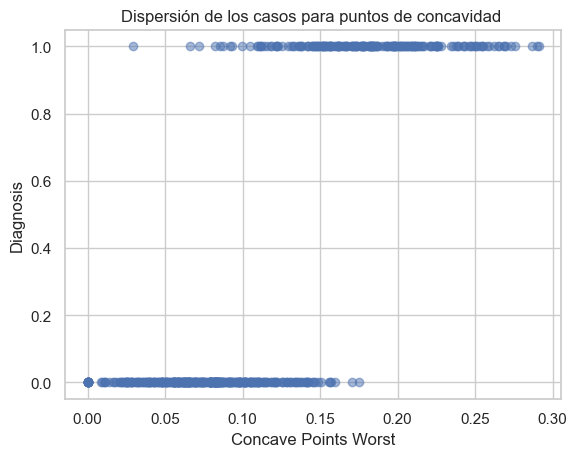

In [78]:
filtered_df = df['diagnosis']

# Variables
concave_points_mean_values = df['concave points_worst']
variable_numerica_values = filtered_df

# Crear el gráfico de dispersión
plt.scatter(concave_points_mean_values, variable_numerica_values, alpha=0.5)

# Etiquetas y título
plt.xlabel('Concave Points Worst')
plt.ylabel('Diagnosis')
plt.title('Dispersión de los casos para puntos de concavidad ')

# Mostrar el gráfico
plt.show()

## Conclusion
Le asignamos "1" a los casos malignos y "0" a los casos benignos. Finalmente estudiamos la concavidad del tumor. Nuevamente, entre mas amplia la concavidad, mas aumentan las posibilidades de que el cancer sea maligno. Los casos que superen el valor de 0.15, de la media previamente calculada, seran una alerta a tener en cuenta a la hora de determinar si el tumor es maligno

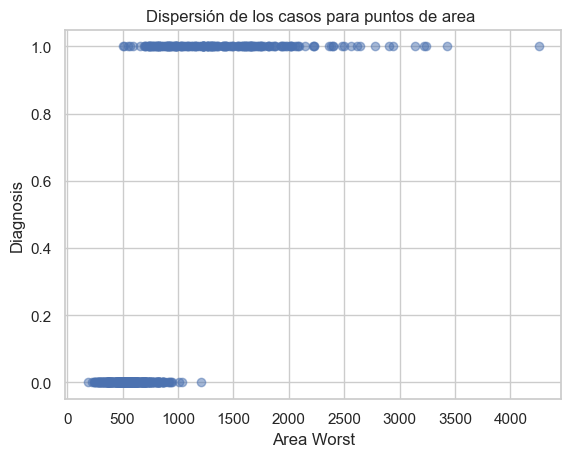

In [79]:
filtered_df = df['diagnosis']

# Variables
concave_points_mean_values = df['area_worst']
variable_numerica_values = filtered_df

# Crear el gráfico de dispersión
plt.scatter(concave_points_mean_values, variable_numerica_values, alpha=0.5)

# Etiquetas y título
plt.xlabel('Area Worst')
plt.ylabel('Diagnosis')
plt.title('Dispersión de los casos para puntos de area ')

# Mostrar el gráfico
plt.show()

## Conclusion
Le asignamos "1" a los casos malignos y "0" a los casos benignos. Finalmente estudiamos el area del tumor. Nuevamente, entre mas amplitud posee el area, mas aumentan las posibilidades de que el cancer sea maligno. Los casos que superen el valor de 750, de la media previamente calculada, seran una alerta a tener en cuenta a la hora de determinar si el tumor es maligno. Para este caso, se realizara un corte para los valores que superen 2000, ya que son pocos los casos que superan dicho valor

In [80]:
df_filtrado = df[df['area_worst'] < 2000]

## Arbol de decision

Continuando con el analisis, se prosigue con un arbol de decision

In [81]:
lista_predictores = ['concave points_worst','radius_worst','area_worst']

In [82]:
X = df[lista_predictores].values

In [83]:
y = df['diagnosis'].values

In [84]:
clf = DecisionTreeClassifier(random_state = 1234, 
                             criterion = 'gini', 
                             splitter = 'best', 
                             max_depth = 4, 
                             min_samples_leaf = 20 
                            )
clf.feature_names = lista_predictores
model = clf.fit(X, y)

[Text(0.625, 0.9, 'node #0\nradius_worst <= 16.795\nsamples = 100.0%\nvalue = [0.627, 0.373]\nclass = Maligno'),
 Text(0.4166666666666667, 0.7, 'node #1\nconcave points_worst <= 0.136\nsamples = 66.6%\nvalue = [0.913, 0.087]\nclass = Maligno'),
 Text(0.25, 0.5, 'node #2\narea_worst <= 785.75\nsamples = 58.5%\nvalue = [0.985, 0.015]\nclass = Maligno'),
 Text(0.16666666666666666, 0.3, 'node #3\narea_worst <= 653.45\nsamples = 54.8%\nvalue = [0.99, 0.01]\nclass = Maligno'),
 Text(0.08333333333333333, 0.1, 'node #4\nsamples = 44.6%\nvalue = [0.996, 0.004]\nclass = Maligno'),
 Text(0.25, 0.1, 'node #5\nsamples = 10.2%\nvalue = [0.966, 0.034]\nclass = Maligno'),
 Text(0.3333333333333333, 0.3, 'node #6\nsamples = 3.7%\nvalue = [0.905, 0.095]\nclass = Maligno'),
 Text(0.5833333333333334, 0.5, 'node #7\nconcave points_worst <= 0.16\nsamples = 8.1%\nvalue = [0.391, 0.609]\nclass = Benigno'),
 Text(0.5, 0.3, 'node #8\nsamples = 4.6%\nvalue = [0.615, 0.385]\nclass = Maligno'),
 Text(0.666666666666

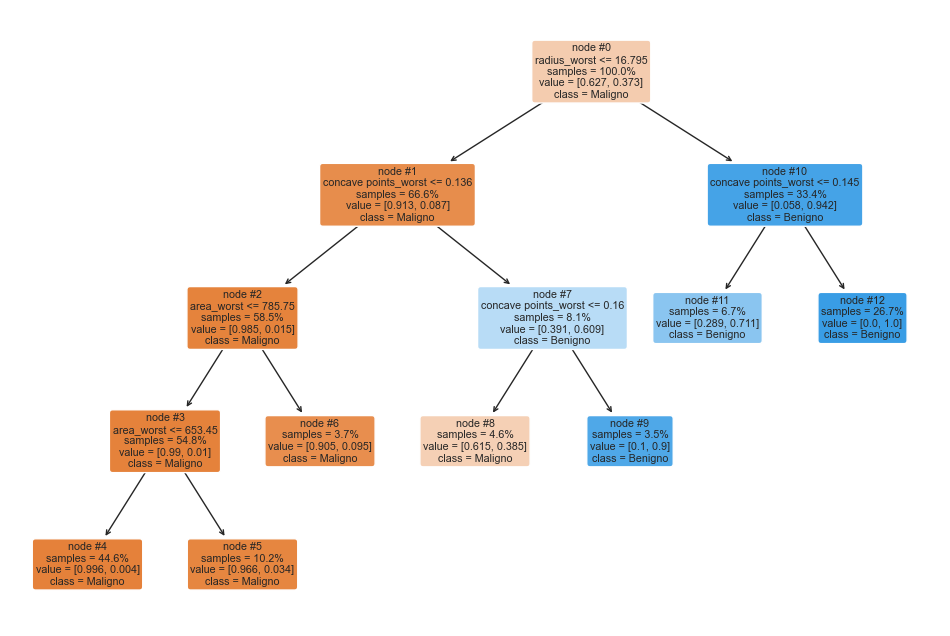

In [85]:
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          filled = True, 
          rounded = True, 
          class_names = ['Maligno','Benigno'], 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True)

In [86]:
# Genero predicciones  
df['Predict_Arbol_Clase'] = clf.predict(df[lista_predictores])
df['Predict_Arbol_Nodo'] = clf.apply(df[lista_predictores])

In [87]:
df['Predict_Arbol_Clase'].value_counts()

Predict_Arbol_Clase
0    359
1    210
Name: count, dtype: int64

In [88]:
# Groupby por prediccion de clase: 
resultados = df.groupby('Predict_Arbol_Clase').agg(
    Cant = ('Predict_Arbol_Clase', 'count'),              
    Casos = ('diagnosis', 'sum'),            
    Tasa_casos = ('diagnosis', 'mean')    
).reset_index()
resultados

,Predict_Arbol_Clase,Cant,Casos,Tasa_casos
0,0,359,15,0.041783
1,1,210,197,0.938095


# Hipotesis
Utilizando las variables 'concave points_worst','smoothness_worst','radius_worst','area_worst' en el arbol de prediccion, logramos un porcentaje de efectividad del 93%, para los casos malignos, permitiendo detectar el cancer, con mayor efectividad

### Genero el primer modelo a traves de Random Forest

**Variable dependiente:** 
Diagnosis

**Variables independientes:**
concave points_worst,radius_worst,area_worst

In [89]:
#Renombro a la variable Concave points_worst para no tener problemas con la libreria
df = df.rename(columns={'concave points_worst': 'concave'})

## TRAIN Y TEST 
Ahora es momento de testear el modelo

In [90]:
df_train,df_test = train_test_split(df,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 43) #Semilla

In [91]:
# Check tasas similares 
print('Tasa casos TRAIN:')
print(round(df_train['diagnosis'].mean(),2))
print('Tasa casos TEST:')
print(round(df_test['diagnosis'].mean(),2))

Tasa casos TRAIN:
0.38
Tasa casos TEST:
0.34


In [92]:
# Selecciono features y genero inputs del modelo
features = ['concave','radius_worst','area_worst']
X_train = df_train[features].values
y_train = df_train['diagnosis'].values
X_test = df_test[features].values
y_test = df_test['diagnosis'].values

# Genero y entreno
rf_1 = RandomForestClassifier(n_estimators = 100, 
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 50,
                               max_features = 3,
                               criterion = 'gini') 

# Entrenar el modelo
rf_1.fit(X_train, y_train)

# Predicciones
y_pred_train = rf_1.predict(X_train)
y_pred_test = rf_1.predict(X_test)
y_pred_prob_train = rf_1.predict_proba(X_train)[:,1]
y_pred_prob_test = rf_1.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones MODELO 1 TEST')

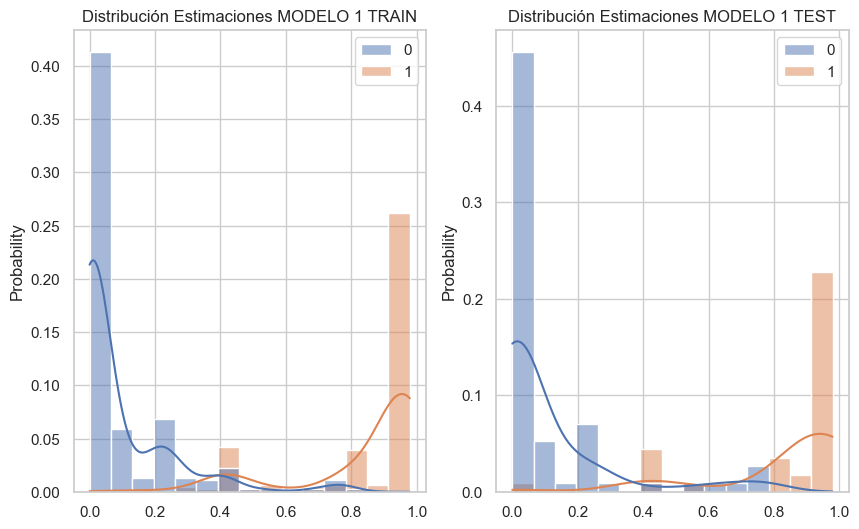

In [93]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 1 TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 1 TEST')

In [94]:
# Poder de ordenamiento
# Agrego predicción en mi dataframes
df_train['Predict_Prob_RF'] = y_pred_prob_train
df_test['Predict_Prob_RF'] = y_pred_prob_test

# Defino cortes
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = range(1, 6)

# Corto
df_train['Predict_RF_Bin'] = pd.cut(df_train['Predict_Prob_RF'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)
df_test['Predict_RF_Bin'] = pd.cut(df_test['Predict_Prob_RF'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_RF_Bin').agg(     
    Cant = ('Predict_RF_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_RF_Bin').agg(     
    Cant = ('Predict_RF_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()


Text(0.5, 1.0, 'Poder de Ordenamiento - MOD 1 TEST')

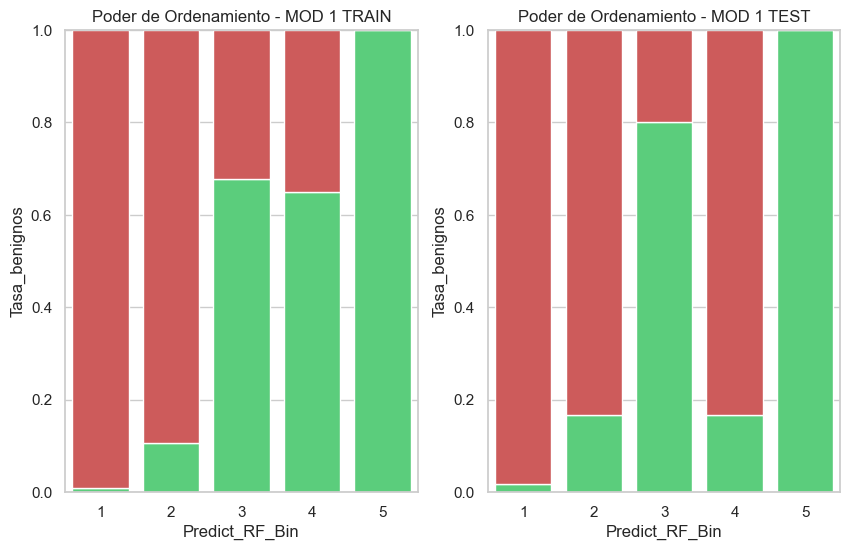

In [95]:
# Barplot por nodo 
resultados_nodo_TRAIN['Tasa_benignos'] = (1 - resultados_nodo_TRAIN['Tasa_malignos'])
resultados_nodo_TEST['Tasa_benignos'] = (1 - resultados_nodo_TEST['Tasa_malignos'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_RF_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_RF_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TRAIN['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - MOD 1 TRAIN')
plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_RF_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_RF_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TEST['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - MOD 1 TEST')

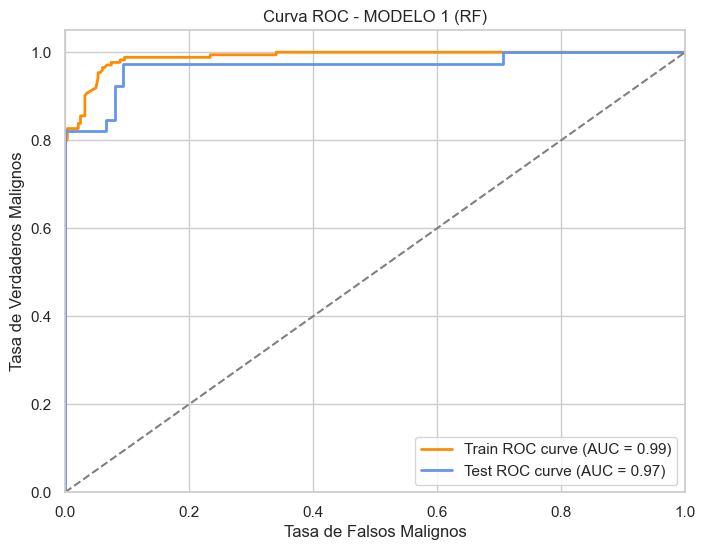

In [96]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_1 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Malignos')
plt.ylabel('Tasa de Verdaderos Malignos')
plt.title('Curva ROC - MODELO 1 (RF)')
plt.legend(loc='lower right')
plt.show()

In [97]:
# Metricas
print('-----------------------------------------------')
print('MODELO 2 - Random Forest')
print('-----------------------------------------------')
print('TRAIN')
accuracy = round(accuracy_score(y_train, y_pred_train),5)
conf_matrix = confusion_matrix(y_train, y_pred_train)
recall = round(recall_score(y_train, y_pred_train),5)
f1 = round(f1_score(y_train, y_pred_train),5)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy = round(accuracy_score(y_test, y_pred_test),5)
conf_matrix = confusion_matrix(y_test, y_pred_test)
recall = round(recall_score(y_test, y_pred_test),5)
f1 = round(f1_score(y_test, y_pred_test),5)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

-----------------------------------------------
MODELO 2 - Random Forest
-----------------------------------------------
TRAIN
Accuracy: 0.92527
Recall: 0.85549
F1 Score: 0.89697
Confusion Matrix:
[[273   9]
 [ 25 148]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.89474
Confusion Matrix:
[[69  6]
 [ 6 33]]
Recall: 0.84615
F1 Score: 0.84615


# Modelo 2: Regresión Logística

In [98]:
# Selecciono features y genero inputs del modelo
features = ['concave','radius_worst','area_worst']
X_train = df_train[features].values
y_train = df_train['diagnosis'].values
X_test = df_test[features].values
y_test = df_test['diagnosis'].values

# Genero y entreno
reg_log_1 = LogisticRegression()
reg_log_1.fit(X_train, y_train)

# Predicciones
y_pred_train = reg_log_1.predict(X_train)
y_pred_test = reg_log_1.predict(X_test)
y_pred_prob_train = reg_log_1.predict_proba(X_train)[:,1]
y_pred_prob_test = reg_log_1.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones TEST')

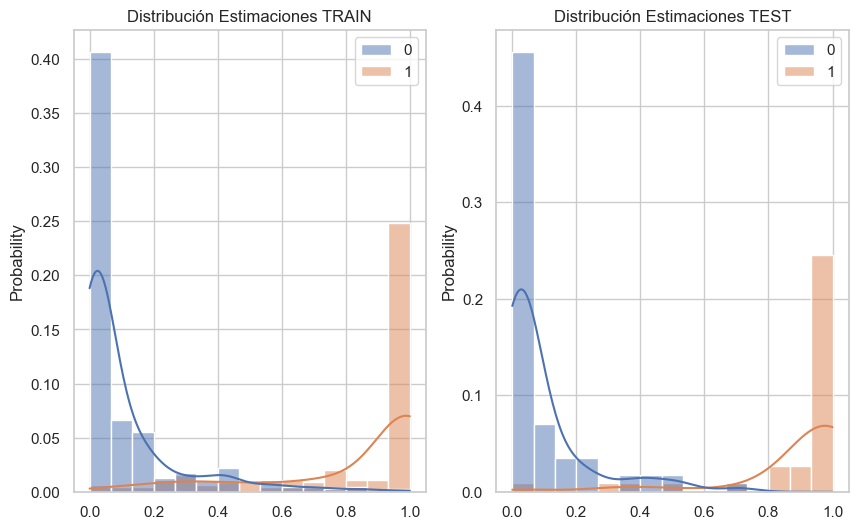

In [99]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TEST')

In [100]:
# Poder de ordenamiento
# Agrego predicción en mi dataframes
df_train['Predict_Prob_RegLog'] = y_pred_prob_train
df_test['Predict_Prob_RegLog'] = y_pred_prob_test

# Defino cortes
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = range(1, 6)

# Corto
df_train['Predict_RegLog_Bin'] = pd.cut(df_train['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)
df_test['Predict_RegLog_Bin'] = pd.cut(df_test['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()


Text(0.5, 1.0, 'Poder de Ordenamiento - TEST')

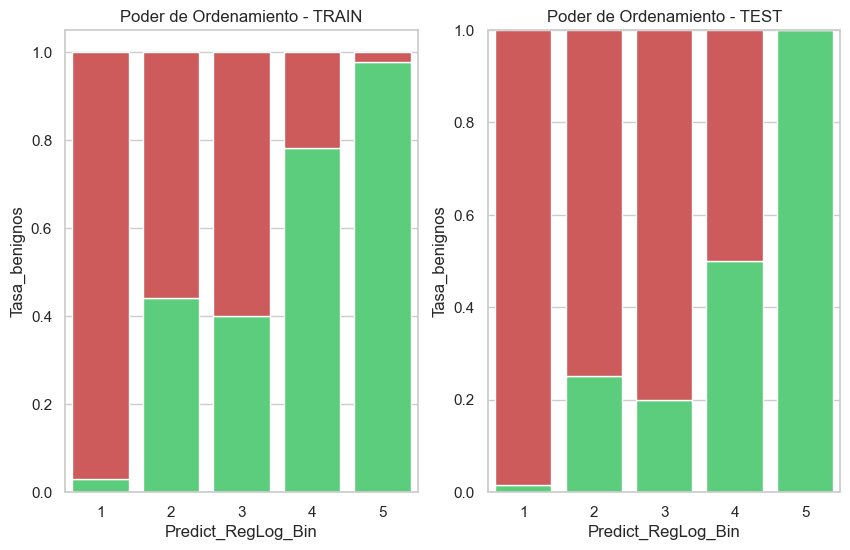

In [101]:
# Barplot por nodo 
resultados_nodo_TRAIN['Tasa_benignos'] = (1 - resultados_nodo_TRAIN['Tasa_malignos'])
resultados_nodo_TEST['Tasa_benignos'] = (1 - resultados_nodo_TEST['Tasa_malignos'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TRAIN['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TRAIN')
plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TEST['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TEST')

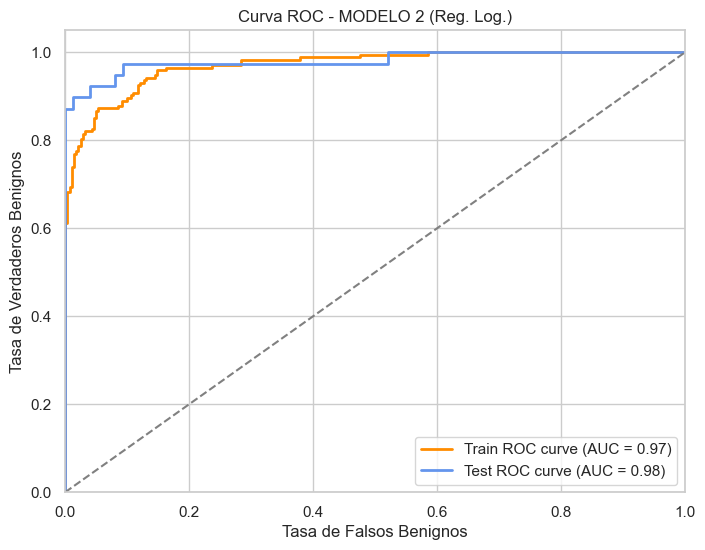

In [102]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_2 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Benignos')
plt.ylabel('Tasa de Verdaderos Benignos')
plt.title('Curva ROC - MODELO 2 (Reg. Log.)')
plt.legend(loc='lower right')
plt.show()

In [103]:
# Metricas
print('TRAIN')
accuracy_rg1_train = round(accuracy_score(y_train, y_pred_train),5)
conf_matrix_rg1_train = confusion_matrix(y_train, y_pred_train)
recall_rg1_train = round(recall_score(y_train, y_pred_train),5)
f1_rg1_train = round(f1_score(y_train, y_pred_train),5)

print(f'Accuracy: {accuracy_rg1_train}')
print(f'Recall: {recall_rg1_train}')
print(f'F1 Score: {f1_rg1_train}')
print(f'Confusion Matrix:\n{conf_matrix_rg1_train}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy_rg1_test = round(accuracy_score(y_test, y_pred_test),5)
conf_matrix_rg1_test = confusion_matrix(y_test, y_pred_test)
recall_rg1_test = round(recall_score(y_test, y_pred_test),5)
f1_rg1_test = round(f1_score(y_test, y_pred_test),5)

print(f'Accuracy: {accuracy_rg1_test}')
print(f'Confusion Matrix:\n{conf_matrix_rg1_test}')
print(f'Recall: {recall_rg1_test}')
print(f'F1 Score: {f1_rg1_test}')

TRAIN
Accuracy: 0.90989
Recall: 0.83815
F1 Score: 0.87613
Confusion Matrix:
[[269  13]
 [ 28 145]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.94737
Confusion Matrix:
[[72  3]
 [ 3 36]]
Recall: 0.92308
F1 Score: 0.92308


# Modelo 3: KNN

In [104]:
# Selecciono features y genero inputs del modelo
features = ['concave','radius_worst','area_worst']
X_train = df_train[features].values
y_train = df_train['diagnosis'].values
X_test = df_test[features].values
y_test = df_test['diagnosis'].values

# Genero y entreno
KNN_1 = KNeighborsClassifier(n_neighbors = 30,
                            metric='euclidean')

# Entrenar el modelo
KNN_1.fit(X_train, y_train)

# Predicciones
y_pred_train = KNN_1.predict(X_train)
y_pred_test = KNN_1.predict(X_test)
y_pred_prob_train = KNN_1.predict_proba(X_train)[:,1]
y_pred_prob_test = KNN_1.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones MODELO 3 TEST')

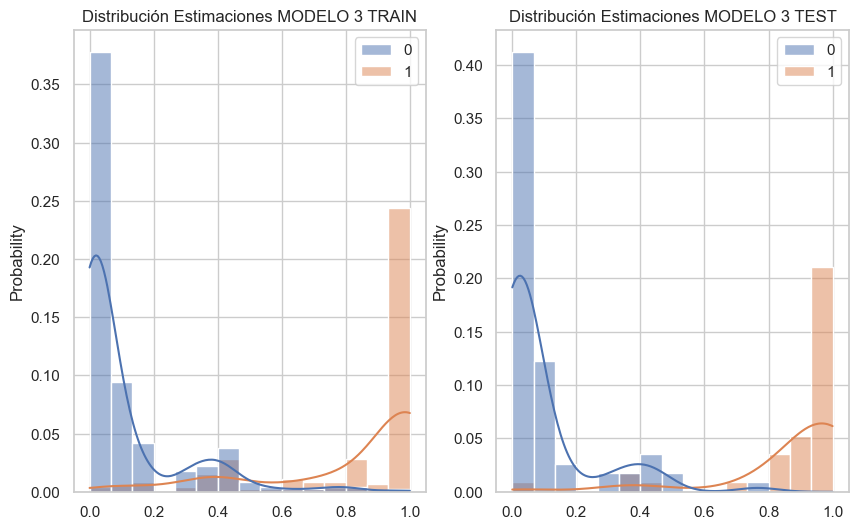

In [105]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 3 TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 3 TEST')

In [106]:
# Poder de ordenamiento
# Agrego predicción en mi dataframes
df_train['Predict_Prob_KNN'] = y_pred_prob_train
df_test['Predict_Prob_KNN'] = y_pred_prob_test

# Defino cortes
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = range(1, 6)

# Corto
df_train['Predict_KNN_Bin'] = pd.cut(df_train['Predict_Prob_KNN'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)
df_test['Predict_KNN_Bin'] = pd.cut(df_test['Predict_Prob_KNN'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_KNN_Bin').agg(     
    Cant = ('Predict_KNN_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_KNN_Bin').agg(     
    Cant = ('Predict_KNN_Bin', 'count'),              
    Cant_malignos = ('diagnosis', 'sum'),            
    Tasa_malignos = ('diagnosis', 'mean')    
).reset_index()

Text(0.5, 1.0, 'Poder de Ordenamiento - MOD 3 TEST')

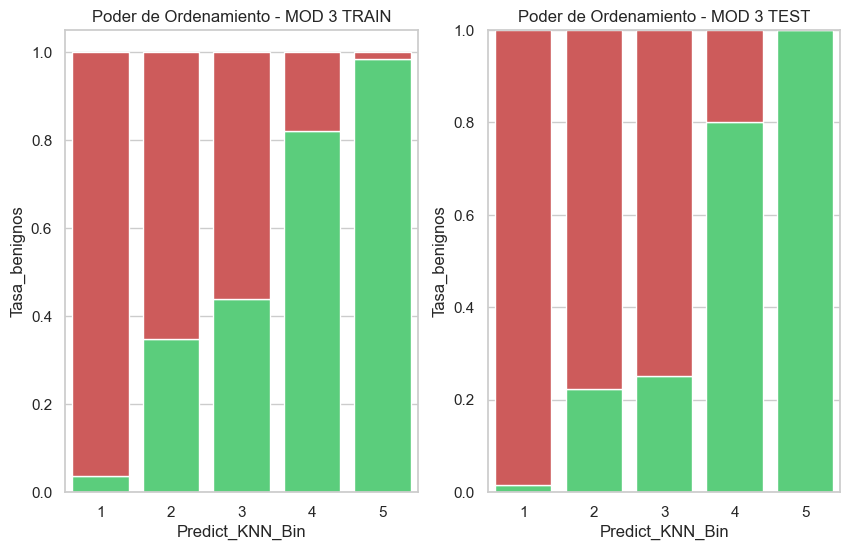

In [107]:
# Barplot por nodo 
resultados_nodo_TRAIN['Tasa_benignos'] = (1 - resultados_nodo_TRAIN['Tasa_malignos'])
resultados_nodo_TEST['Tasa_benignos'] = (1 - resultados_nodo_TEST['Tasa_malignos'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_KNN_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_KNN_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TRAIN['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - MOD 3 TRAIN')
plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_KNN_Bin',
            y = 'Tasa_malignos', 
            label = 'Porcentaje Casos Malignos',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_KNN_Bin', 
            y = 'Tasa_benignos', 
            bottom=resultados_nodo_TEST['Tasa_malignos'], 
            label = 'Porcentaje Casos Benignos',
            color = '#E04848')
plt.title('Poder de Ordenamiento - MOD 3 TEST')

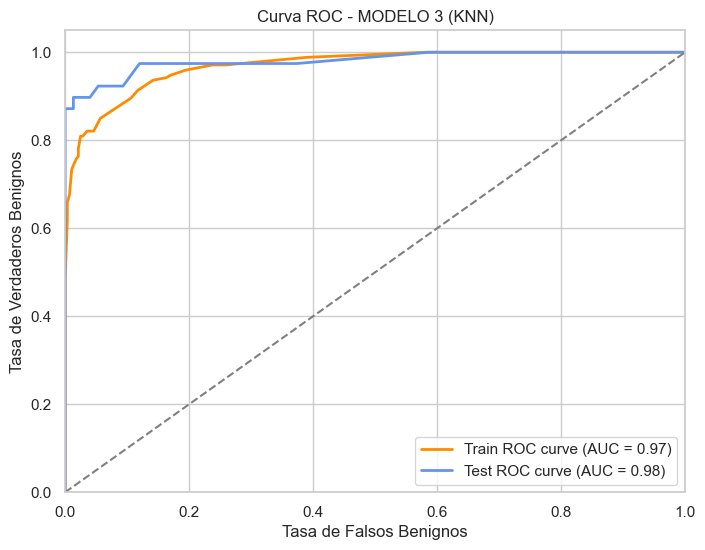

In [108]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_3 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Benignos')
plt.ylabel('Tasa de Verdaderos Benignos')
plt.title('Curva ROC - MODELO 3 (KNN)')
plt.legend(loc='lower right')
plt.show()

In [109]:
# Metricas
print('-----------------------------------------------')
print('MODELO 3 -  KNN')
print('-----------------------------------------------')
print('TRAIN')
accuracy = round(accuracy_score(y_train, y_pred_train),5)
conf_matrix = confusion_matrix(y_train, y_pred_train)
recall = round(recall_score(y_train, y_pred_train),5)
f1 = round(f1_score(y_train, y_pred_train),5)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy = round(accuracy_score(y_test, y_pred_test),5)
conf_matrix = confusion_matrix(y_test, y_pred_test)
recall = round(recall_score(y_test, y_pred_test),5)
f1 = round(f1_score(y_test, y_pred_test),5)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

-----------------------------------------------
MODELO 3 -  KNN
-----------------------------------------------
TRAIN
Accuracy: 0.90989
Recall: 0.81503
F1 Score: 0.87307
Confusion Matrix:
[[273   9]
 [ 32 141]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.95614
Confusion Matrix:
[[74  1]
 [ 4 35]]
Recall: 0.89744
F1 Score: 0.93333


# Comparando ROC y AUC

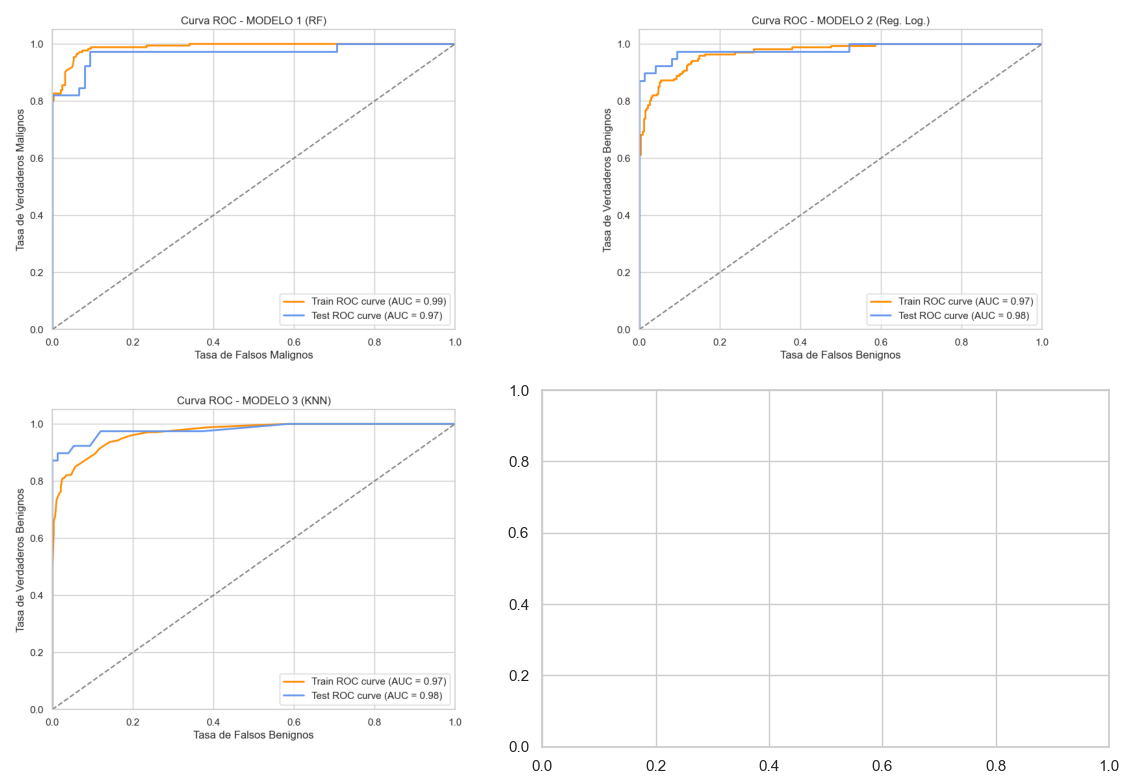

In [110]:
# Crear una nueva figura y configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]


ax1.axis('off')
ax1.imshow(roc_1.canvas.renderer.buffer_rgba())  
ax2.axis('off')
ax2.imshow(roc_2.canvas.renderer.buffer_rgba())
ax3.axis('off')
ax3.imshow(roc_3.canvas.renderer.buffer_rgba())


plt.tight_layout()

plt.show()

# Tunenado Regresión Logística

A modo de prueba, comprobaremos si encontrando los mejores hiperparametros para nuestro modelo, podremos mejorarlo

In [111]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#Definimos los parámetros de búsqueda
param_grid = {
    'fit_intercept' : [True,False],
    'penalty': ['l1', 'l2','elasticnet','none'],
    'C':[0.001, 0.005, 0.01, 0.1, 1, 10],
    'max_iter':[50,80,100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Modelo
reg_log_2 = LogisticRegression()

# Crear objeto GridSearchCV
grid_search = GridSearchCV(estimator = reg_log_2, 
                           param_grid = param_grid, 
                           cv = 3, 
                           scoring = 'accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mostrar la mejor puntuación (exactitud en este caso)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Mejores hiperparámetros: {'C': 0.001, 'fit_intercept': True, 'max_iter': 80, 'penalty': 'none', 'solver': 'newton-cg'}
Mejor puntuación de validación cruzada: 0.956009643313582
Exactitud en el conjunto de prueba: 0.9649122807017544


# Modelo 4

In [112]:
# Selecciono features y genero inputs del modelo
features = ['concave','radius_worst','area_worst']
X_train = df_train[features].values
y_train = df_train['diagnosis'].values
X_test = df_test[features].values
y_test = df_test['diagnosis'].values

# Genero y entreno
reg_log_2 = LogisticRegression(C = 0.001,
                              fit_intercept = True,
                              max_iter = 50,
                              penalty = 'none', 
                              solver = 'newton-cg')
reg_log_2.fit(X_train, y_train)

# Predicciones
y_pred_train = reg_log_2.predict(X_train)
y_pred_test = reg_log_2.predict(X_test)
y_pred_prob_train = reg_log_2.predict_proba(X_train)[:,1]
y_pred_prob_test = reg_log_2.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Distribución Estimaciones TEST')

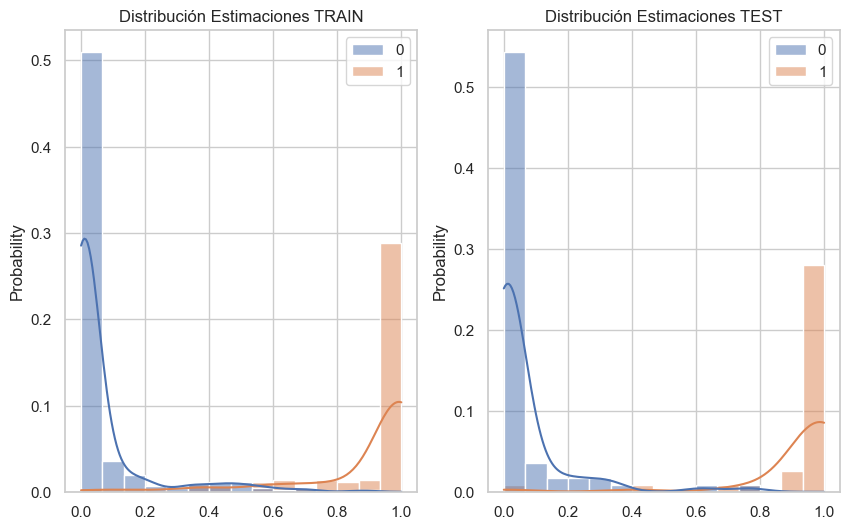

In [113]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TEST')

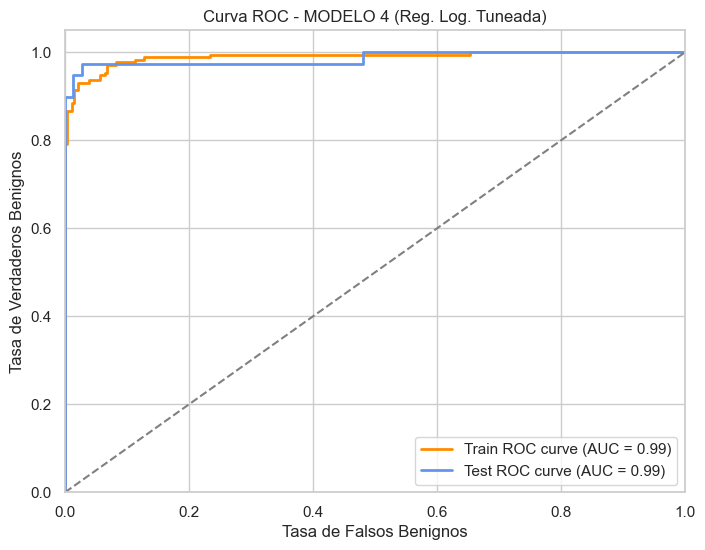

In [114]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
roc_4 = plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Benignos')
plt.ylabel('Tasa de Verdaderos Benignos')
plt.title('Curva ROC - MODELO 4 (Reg. Log. Tuneada)')
plt.legend(loc='lower right')
plt.show()

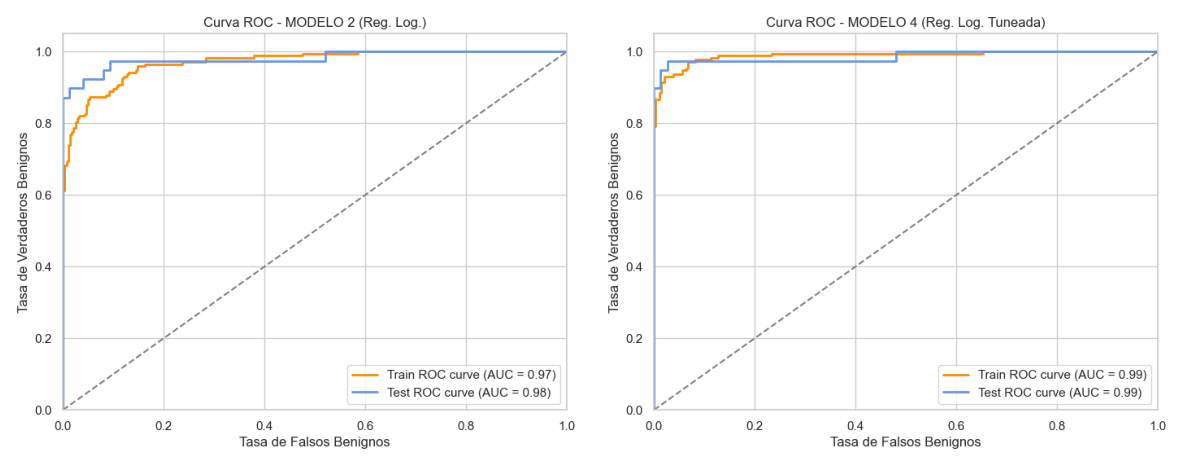

In [115]:
# Crear una nueva figura y configurar subplots
fig, axes = plt.subplots(1,2, figsize=(12, 8))

ax1 = axes[0]
ax2 = axes[1]

ax1.axis('off')
ax1.imshow(roc_2.canvas.renderer.buffer_rgba())  
ax2.axis('off')
ax2.imshow(roc_4.canvas.renderer.buffer_rgba())

plt.tight_layout()

plt.show()

In [116]:
# Metricas
print('-----------------------------------------------')
print('MODELO 2 - Reg. Log.')
print('TRAIN')

print(f'Accuracy: {accuracy_rg1_train}')
print(f'Recall: {recall_rg1_train}')
print(f'F1 Score: {f1_rg1_train}')
print('-----------------------------------------------')
print('TEST')
print(f'Accuracy: {accuracy_rg1_test}')
print(f'Recall: {recall_rg1_test}')
print(f'F1 Score: {f1_rg1_test}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('MODELO 4 - Reg. Log. Tuneada')
print('TRAIN')
accuracy_rg2_train = round(accuracy_score(y_train, y_pred_train),5)
recall_rg2_train = round(recall_score(y_train, y_pred_train),5)
f1_rg2_train = round(f1_score(y_train, y_pred_train),5)
print(f'Accuracy: {accuracy_rg2_train}')
print(f'Recall: {recall_rg2_train}')
print(f'F1 Score: {f1_rg2_train}')
print('-----------------------------------------------')
print('TEST')
accuracy_rg2_test = round(accuracy_score(y_test, y_pred_test),5)
recall_rg2_test = round(recall_score(y_test, y_pred_test),5)
f1_rg2_test = round(f1_score(y_test, y_pred_test),5)
print(f'Accuracy: {accuracy_rg2_test}')
print(f'Recall: {recall_rg2_test}')
print(f'F1 Score: {f1_rg2_test}')

-----------------------------------------------
MODELO 2 - Reg. Log.
TRAIN
Accuracy: 0.90989
Recall: 0.83815
F1 Score: 0.87613
-----------------------------------------------
TEST
Accuracy: 0.94737
Recall: 0.92308
F1 Score: 0.92308
-----------------------------------------------
-----------------------------------------------
MODELO 4 - Reg. Log. Tuneada
TRAIN
Accuracy: 0.95385
Recall: 0.93064
F1 Score: 0.93878
-----------------------------------------------
TEST
Accuracy: 0.96491
Recall: 0.94872
F1 Score: 0.94872


## Hipotesis

Observando los modelos trabajados, podemos determinar que el mejor modelo para tomar es el numero cuatro, donde se elijen los mejores hiperparametros para la regresion logistica, obteniendo mas similitud entre los datos del entrenamiento y el testeo